In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

C:\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence
C:\anaconda3\envs\machine_learning\lib\site-packages\sklearn\model_selection\_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
C:\anaconda3\envs\machine_learning\lib\site-packages\sklearn\model_selection\_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence


In [5]:
lda = LinearDiscriminantAnalysis(n_components = 2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


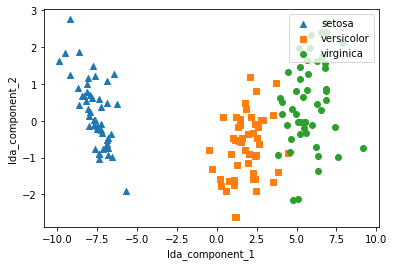

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns = lda_columns)
irisDF_lda['target'] = iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현 
markers = ['^', 's', 'o']

#setosa의 target값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_2']
    
    plt.scatter(x_axis_data, y_axis_data, marker = marker , label = iris.target_names[i])
    
plt.legend(loc = 'upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()